<a href="https://colab.research.google.com/github/CesarSanchezA/Challenge_Telecom2/blob/main/Proyecto2_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo del proyecto



* ¿quiénes son los clientes con mayor riesgo de evasión?
* ¿qué variables influyen más en este comportamiento?
* ¿qué tipo de perfil necesita la empresa para mantenerse más cerca?

# Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import xgboost as xgb

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE


# Carga de datos

In [2]:
archivo = '/content/drive/MyDrive/Alura/2_Challenge_Telecom/datos.csv'

datos = pd.read_csv(archivo)
datos

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,female,0,1,1,9,1,0,dsl,0,...,0,1,1,0,one year,1,mailed check,65,593,2.186667
1,0,male,0,0,0,9,1,1,dsl,0,...,0,0,0,1,month-to-month,0,mailed check,59,542,1.996667
2,1,male,0,0,0,4,1,0,fiber optic,0,...,1,0,0,0,month-to-month,1,electronic check,73,280,2.463333
3,1,male,1,1,0,13,1,0,fiber optic,0,...,1,0,1,1,month-to-month,1,electronic check,98,1237,3.266667
4,1,female,1,1,0,3,1,0,fiber optic,0,...,0,1,1,0,month-to-month,1,mailed check,83,267,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,female,0,0,0,13,1,0,dsl,1,...,0,1,0,0,one year,0,mailed check,55,742,1.838333
7039,1,male,0,1,0,22,1,1,fiber optic,0,...,0,0,0,1,month-to-month,1,electronic check,85,1873,2.836667
7040,0,male,0,0,0,2,1,0,dsl,0,...,0,0,0,0,month-to-month,1,mailed check,50,92,1.676667
7041,0,male,0,1,1,67,1,0,dsl,1,...,1,1,0,1,two year,0,mailed check,67,4627,2.261667


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [4]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.295897,2279.265086,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.092727,2266.790864,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,398.000000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,1394.000000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,3786.500000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.000000,8684.000000,3.958333


In [5]:
datos.describe(include='O')

,gender,InternetService,Contract,PaymentMethod
count,7043,7043,7043,7043
unique,2,3,3,4
top,male,fiber optic,month-to-month,electronic check
freq,3555,3096,3875,2365


## Verificación de la Proporción de Cancelación (Churn)

churn = 1        dejó de ser cliente

churn = 0        cliente

In [6]:
conteo_class = datos["Churn"].value_counts()
print(conteo_class)

Churn
0    5174
1    1869
Name: count, dtype: int64


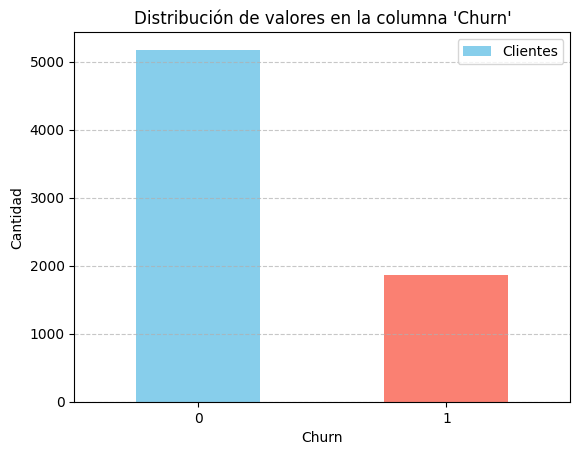

In [7]:
conteo_class.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribución de valores en la columna 'Churn'")
plt.xlabel("Churn")
plt.ylabel("Cantidad")
plt.legend(['Clientes','Exclientes'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:

C_M = conteo_class[1]  # clase_Exclientes
c_m = conteo_class[0]  # Clase_Clientes
tot = len(datos["Churn"])
CM = (C_M*100)/tot
cm = (c_m*100)/tot

print('Porcentaje de Clientes: ', round(cm,3), '%')
print('Porcentaje de Exclientes: ', round(CM,3), '%')

Porcentaje de Clientes:  73.463 %
Porcentaje de Exclientes:  26.537 %


Dado que los resultados son 73.5 y 26.5 %, es necesario hacer un balanceo de cargas

In [9]:
categoricas = ['gender', 'InternetService','Contract', 'PaymentMethod']

datos_codificados = pd.get_dummies(data = datos, columns = categoricas, dtype = int)
datos_codificados

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer automatic,PaymentMethod_credit card automatic,PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,0,22,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7040,0,0,0,0,2,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
7041,0,0,1,1,67,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [10]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

# Análisis de Correlación

In [11]:
matriz_correlacion = datos_codificados.corr()

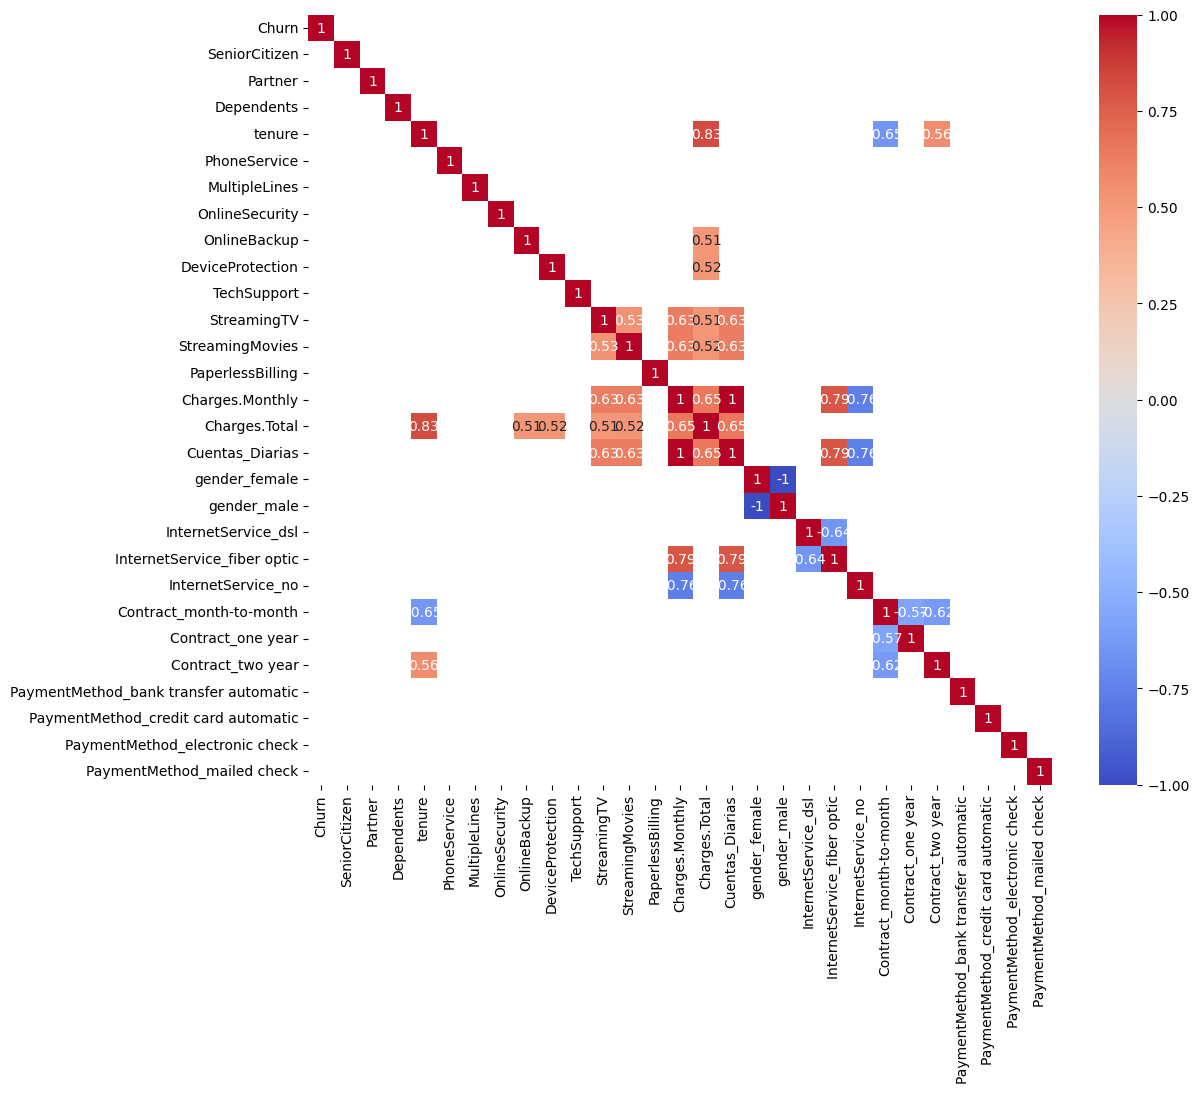

In [12]:
corr_alta = matriz_correlacion[(matriz_correlacion > 0.5) | (matriz_correlacion < -0.5)]
plt.figure(figsize=(12, 10))
sns.heatmap(corr_alta, annot=True, cmap="coolwarm")
plt.show()

# Análisis Dirigido

In [13]:
fig = px.histogram(datos, x='Contract', color='Churn',
                   marginal='box', nbins=50,
                   title='Distribución de Cancelación por Contratos',
                   barmode='overlay', opacity=0.7)
fig.show()

In [14]:
fig = px.histogram(datos, x='Charges.Total', color='Churn',
                   marginal='box', nbins=50,
                   title='Distribución de Cancelación por Cargos totales',
                   barmode='overlay', opacity=0.7)
fig.show()

In [15]:
fig = px.histogram(datos, x='gender', color='Churn',
                   marginal='box', nbins=50,
                   title='Distribución de Cancelación por Género',
                   barmode='overlay', opacity=0.7)
fig.show()

In [16]:
fig = px.histogram(datos, x='Dependents', color='Churn',
                   marginal='box', nbins=50,
                   title='Distribución de Cancelación por Dependientes',
                   barmode='overlay', opacity=0.7)
fig.show()

# Creando el modelo inicial

In [17]:
df = datos_codificados

X = df.drop(columns='Churn', axis = 1)
y = df.Churn

In [18]:
dummy = DummyClassifier()
dummy.fit(X, y)
print(f'la exactitud del modelo inicial es: {dummy.score(X, y):.4f}')

la exactitud del modelo inicial es: 0.7346


# Clasificando los datos

# Datos de entrenamiento, prueba y validación

* 85% de los datos totales se hace un nuevo conjunto (5,986), (X, y)
* 15% de los datos totales se hace el conjunto prueba (1,057), (X_test, y_test)

In [19]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.15, stratify = y, random_state = 5)

* 75% de los datos del nuevo conjunto (4,489) se vuelven en datos de entrenamiento (X_train, y_train)

* 25% de los datos del nuevo conjunto (1,497) se vuelven en datos de validación (X_val, y_val)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 5)

    Aprenda bien (X_train), Entrenar el modelo (ajustar pesos/parámetros).

    No sobreajuste (X_val), Evaluar el modelo durante el ajuste de hiperparámetros (como max_depth).

    Generealice (X_test), Evaluación final del modelo (simula datos nunca vistos.

# DecisionTreeClassifier

## Creando el modelo

In [21]:
modelo = DecisionTreeClassifier()

## Entrenando el modelo

In [22]:
modelo.fit(X, y)
print(f'la exactitud del modelo es: {modelo.score(X, y):.4f}')

la exactitud del modelo es: 0.9977


In [23]:
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train):.4f}')
print(f'Precisión de validación: {modelo.score(X_val, y_val):.4f}')

Precisión de entrenamiento: 0.9975
Precisión de validación: 0.7388


## Creando el modelo con profundidad igual a tres

In [24]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(X_train, y_train)

print(f'El modelo con profundidad 3 es:')
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train):.4f}')
print(f'Precisión de validación: {modelo.score(X_val, y_val):.4f}')

El modelo con profundidad 3 es:
Precisión de entrenamiento: 0.7904
Precisión de validación: 0.7876


## Evaluando el modelo con profundidad igual a tres

In [25]:
y_previsto = modelo.predict(X_val)
print(round(accuracy_score(y_val, y_previsto),4))

0.7876


In [26]:
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[1027   73]
 [ 245  152]]


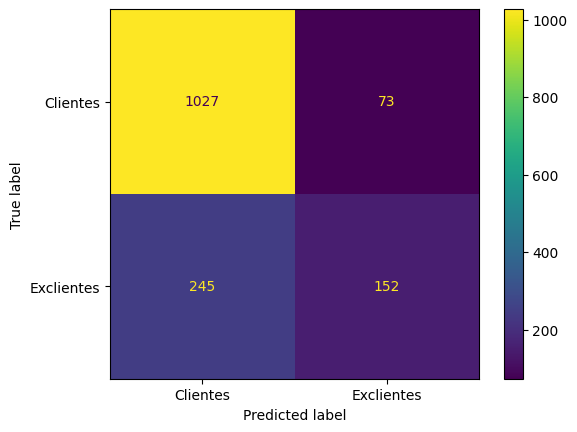

In [27]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = ['Clientes', 'Exclientes'])
visualizacion.plot();

## Métricas de evaluación

In [28]:
precision = precision_score(y_val, y_previsto)
sensibilidad = recall_score(y_val, y_previsto)
exactitud = accuracy_score(y_val, y_previsto)
f1 = f1_score(y_val, y_previsto)

print(f'La precisión del modelo es: {precision}')
print(f'La sensibilidad (recall) del modelo es: {sensibilidad}')
print(f'La exactitud (accuracy) del modelo es: {exactitud}')
print(f'El F1_score del modelo es: {f1}')

La precisión del modelo es: 0.6755555555555556
La sensibilidad (recall) del modelo es: 0.38287153652392947
La exactitud (accuracy) del modelo es: 0.7875751503006012
El F1_score del modelo es: 0.4887459807073955


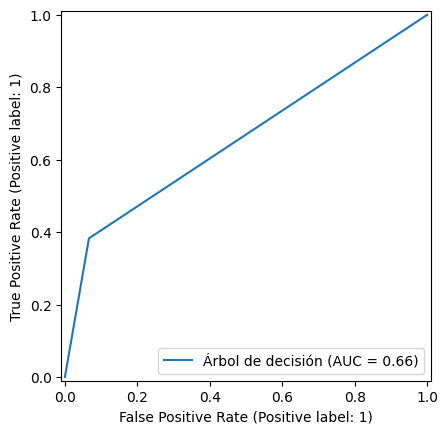

In [29]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de decisión');

In [30]:
auc = roc_auc_score(y_val, y_previsto)
print(f'El área bajo la curva ROC es: {auc:.4f}')

El área bajo la curva ROC es: 0.6583


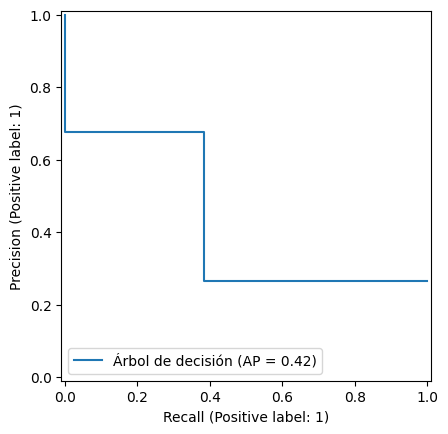

In [31]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de decisión')

In [32]:
ap = average_precision_score(y_val, y_previsto)
print(f'El score promedio de precisón vs recall es {ap:.4f}')

El score promedio de precisón vs recall es 0.4223


## Informe de métricas

In [33]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1100
           1       0.68      0.38      0.49       397

    accuracy                           0.79      1497
   macro avg       0.74      0.66      0.68      1497
weighted avg       0.77      0.79      0.77      1497



# RandomForestClassifier

## Creando el modelo

In [34]:
modelo = RandomForestClassifier(max_depth = 3)

## Entrenando el modelo

In [35]:
modelo.fit(X, y)
print(f'la exactitud del modelo es: {modelo.score(X, y):.4f}')

la exactitud del modelo es: 0.7858


In [36]:
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train):.4f}')
print(f'Precisión de validación: {modelo.score(X_val, y_val):.4f}')

Precisión de entrenamiento: 0.7884
Precisión de validación: 0.7923


## Evaluando el modelo

In [37]:
y_previsto = modelo.predict(X_val)
print(round(accuracy_score(y_val, y_previsto),4))

0.7923


In [38]:
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[1041   59]
 [ 252  145]]


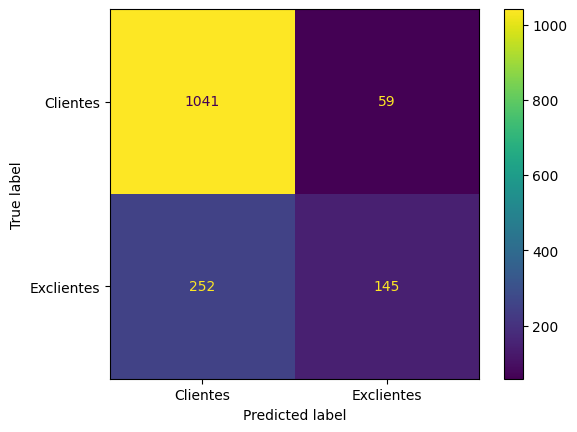

In [39]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = ['Clientes', 'Exclientes'])
visualizacion.plot();

## Métricas de evaluación

In [40]:
precision = precision_score(y_val, y_previsto)
sensibilidad = recall_score(y_val, y_previsto)
exactitud = accuracy_score(y_val, y_previsto)
f1 = f1_score(y_val, y_previsto)

print(f'La precisión del modelo es: {precision}')
print(f'La sensibilidad (recall) del modelo es: {sensibilidad}')
print(f'La exactitud (accuracy) del modelo es: {exactitud}')
print(f'El F1_score del modelo es: {f1}')

La precisión del modelo es: 0.7107843137254902
La sensibilidad (recall) del modelo es: 0.36523929471032746
La exactitud (accuracy) del modelo es: 0.7922511690046761
El F1_score del modelo es: 0.4825291181364393


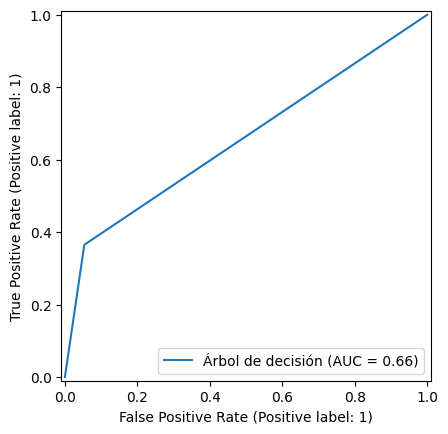

In [41]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de decisión');

In [42]:
auc = roc_auc_score(y_val, y_previsto)
print(f'El área bajo la curva ROC es: {auc:.4f}')

El área bajo la curva ROC es: 0.6558


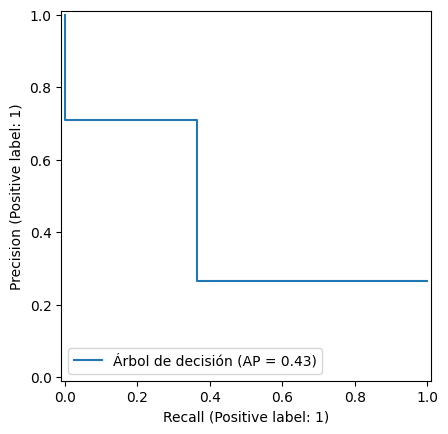

In [43]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de decisión')

In [44]:
ap = average_precision_score(y_val, y_previsto)
print(f'El score promedio de precisón vs recall es {ap:.4f}')

El score promedio de precisón vs recall es 0.4279


## Informe de métricas

In [45]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1100
           1       0.71      0.37      0.48       397

    accuracy                           0.79      1497
   macro avg       0.76      0.66      0.68      1497
weighted avg       0.78      0.79      0.77      1497



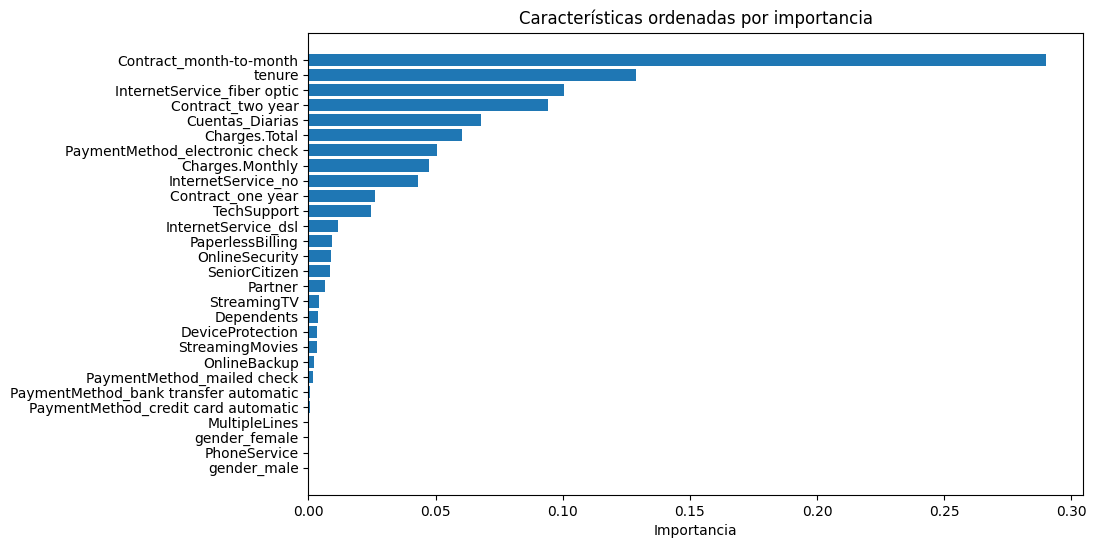

In [46]:
importancias = modelo.feature_importances_

indices = np.argsort(importancias)[::-1]

# Gráfico ordenado
plt.figure(figsize=(10, 6))
plt.barh(range(len(importancias)), importancias[indices], align='center')
plt.yticks(range(len(importancias)), X_train.columns[indices])
plt.xlabel("Importancia")
plt.title("Características ordenadas por importancia")
plt.gca().invert_yaxis()  # La más importante arriba
plt.show()

# Validación cruzada

## Usando KFold

In [47]:
def intervalo_confianza(resultados):
  promedio = (resultados['test_score']).mean()
  desv_estandar = (resultados['test_score']).std()

  intervalo_inferior = promedio - 2 * desv_estandar
  intervalo_superior = min(promedio + 2 * desv_estandar, 1)

  return f'El intervalo de la exactitud es de: {intervalo_inferior} a {intervalo_superior}'

In [48]:
profundidad = 4
partes = 5

In [49]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
kf = KFold(n_splits = partes, shuffle = True, random_state = 5)

# Validación cruzada
cv_resultados = cross_validate(modelo, X, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.0440383 , 0.02444053, 0.02190924, 0.02197409, 0.02292609]),
 'score_time': array([0.00984573, 0.00785112, 0.01264763, 0.00761461, 0.00789452]),
 'test_score': array([0.48844884, 0.58651026, 0.46461538, 0.45253165, 0.49013158])}

In [50]:
print('Para la variable recall se tiene')

intervalo_confianza(cv_resultados)

Para la variable recall se tiene


'El intervalo de la exactitud es de: 0.40197191020484085 a 0.5909231769737513'

In [51]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
kf = KFold(n_splits = partes, shuffle = True, random_state = 5)

# Validación cruzada para la sensibilidad (precision)
cv_resultados = cross_validate(modelo, X, y, cv = kf, scoring = 'precision')
cv_resultados

{'fit_time': array([0.05805922, 0.0274682 , 0.02205992, 0.02544498, 0.03321314]),
 'score_time': array([0.00888753, 0.00844979, 0.01205826, 0.00743103, 0.01148224]),
 'test_score': array([0.61410788, 0.67567568, 0.58754864, 0.64705882, 0.58431373])}

In [52]:
print('Para la variable precision se tiene')

intervalo_confianza(cv_resultados)

Para la variable precision se tiene


'El intervalo de la exactitud es de: 0.55143803685178 a 0.6920438618062228'

In [53]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
kf = KFold(n_splits = partes, shuffle = True, random_state = 5)

# Validación cruzada para la sensibilidad (f1)
cv_resultados = cross_validate(modelo, X, y, cv = kf, scoring = 'f1')
cv_resultados

{'fit_time': array([0.10006857, 0.03165817, 0.10899949, 0.10888886, 0.0877316 ]),
 'score_time': array([0.01734924, 0.01063299, 0.03519058, 0.04545569, 0.01976061]),
 'test_score': array([0.54411765, 0.62794349, 0.51890034, 0.53258845, 0.53309481])}

In [54]:
print('Para la variable f1 score se tiene')

intervalo_confianza(cv_resultados)

Para la variable f1 score se tiene


'El intervalo de la exactitud es de: 0.4730622539106569 a 0.6295956430207515'

In [55]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
kf = KFold(n_splits = partes, shuffle = True, random_state = 5)

# Validación cruzada para la sensibilidad (accuracy)
cv_resultados = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
cv_resultados

{'fit_time': array([0.06658769, 0.07361484, 0.10520387, 0.08196831, 0.09131289]),
 'score_time': array([0.01555395, 0.03599238, 0.02536178, 0.01571107, 0.01171851]),
 'test_score': array([0.79298831, 0.80200501, 0.76608187, 0.79030911, 0.78195489])}

In [56]:
print('Para la variable exactitud se tiene')

intervalo_confianza(cv_resultados)

Para la variable exactitud se tiene


'El intervalo de la exactitud es de: 0.7624285296518469 a 0.810907146767917'

## Estratificando los datos

In [57]:
datos['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [58]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
skf = StratifiedKFold(n_splits = partes, shuffle = True, random_state = 5)

# Validación cruzada para la sensibilidad (recall)
cv_resultados = cross_validate(modelo, X, y, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.04800439, 0.04961371, 0.06490755, 0.03949261, 0.03636956]),
 'score_time': array([0.00807619, 0.02452207, 0.01621199, 0.00881982, 0.01003742]),
 'test_score': array([0.43396226, 0.48264984, 0.54402516, 0.54716981, 0.4245283 ])}

In [59]:
print('Para la variable recall con datos estratificados se tiene')

intervalo_confianza(cv_resultados)

Para la variable recall con datos estratificados se tiene


'El intervalo de la exactitud es de: 0.38213877405438534 a 0.59079537669061'

## Balanceo de los datos

### Oversampling (sobremuestreo)

In [60]:
# SMOTE genera datos sintéticos

oversampling = SMOTE()

# se crea X y y balanceadas
x_balanceada, y_balanceada = oversampling.fit_resample(X, y)

In [61]:
y_balanceada.value_counts()

,count
Churn,
0,4397
1,4397


In [62]:
y_balanceada.value_counts(normalize = True)

,proportion
Churn,
0,0.5
1,0.5


In [63]:
# con stratifiedkfold se tendrá la misma proporción de los datos ahora balanceados

modelo = DecisionTreeClassifier(max_depth = profundidad)
skf = StratifiedKFold(n_splits = partes, shuffle = True, random_state = 5)

# Validación cruzada para la sensibilidad (recall)
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.07544446, 0.06161952, 0.08553481, 0.09416962, 0.09136248]),
 'score_time': array([0.00741291, 0.03469872, 0.03026676, 0.01677251, 0.03284454]),
 'test_score': array([0.82935154, 0.79749716, 0.83181818, 0.87272727, 0.78270762])}

In [64]:
print('Para la variable recall con datos estratificados y balanceados se tiene')

intervalo_confianza(cv_resultados)

Para la variable recall con datos estratificados y balanceados se tiene


'El intervalo de la exactitud es de: 0.760436936762793 a 0.8852037706526585'

### Probando el modelo

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       777
           1       0.58      0.73      0.65       280

    accuracy                           0.79      1057
   macro avg       0.74      0.77      0.75      1057
weighted avg       0.81      0.79      0.80      1057



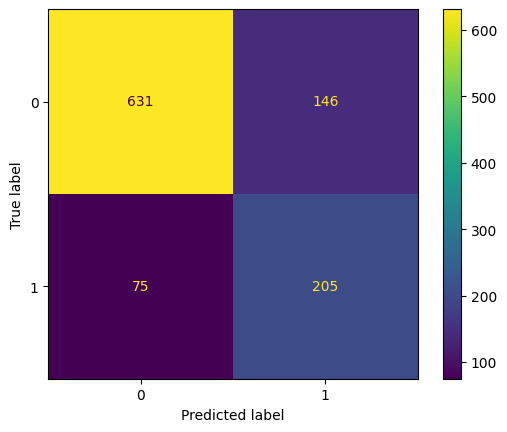

In [65]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

### Pipeline para validación

In [66]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo)])

In [67]:
skf = StratifiedKFold(n_splits = partes, shuffle = True, random_state = 5)

cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.1947422 , 0.16490865, 0.1159029 , 0.15386152, 0.13997579]),
 'score_time': array([0.022609  , 0.01626778, 0.02818489, 0.01904511, 0.01352882]),
 'test_score': array([0.66352201, 0.7444795 , 0.6509434 , 0.72955975, 0.66981132])}

In [68]:
print('Para la variable recall con datos estratificados y con pipeline se tiene')

intervalo_confianza(cv_resultados)

Para la variable recall con datos estratificados y con pipeline se tiene


'El intervalo de la exactitud es de: 0.6160153637292558 a 0.7673110255729683'

### Undersampling

In [69]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo)])

In [70]:
skf = StratifiedKFold(n_splits = partes, shuffle = True, random_state = 5)

cv_resultados = cross_validate(pipeline, X, y, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.25797915, 0.25483966, 0.131006  , 0.14411974, 0.17637706]),
 'score_time': array([0.02875018, 0.00913453, 0.0220654 , 0.00949144, 0.03614712]),
 'test_score': array([0.69496855, 0.829653  , 0.77044025, 0.59748428, 0.55345912])}

In [71]:
print('Para la variable recall con datos estratificados y con pipeline se tiene')

intervalo_confianza(cv_resultados)

Para la variable recall con datos estratificados y con pipeline se tiene


'El intervalo de la exactitud es de: 0.4829048263024449 a 0.8954972529388701'

### Probando el modelo

In [72]:
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       777
           1       0.56      0.60      0.58       280

    accuracy                           0.77      1057
   macro avg       0.71      0.72      0.71      1057
weighted avg       0.78      0.77      0.77      1057



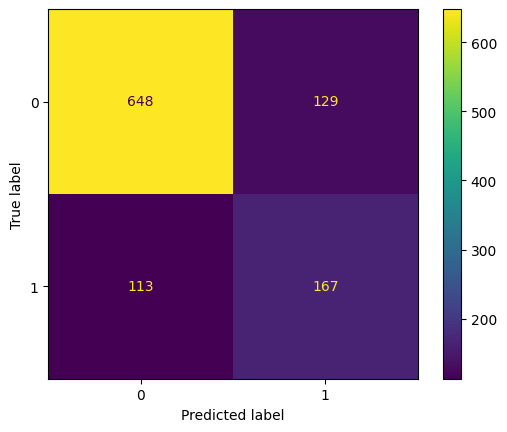

In [73]:
modelo = DecisionTreeClassifier(max_depth = profundidad)
modelo.fit(x_balanceada, y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

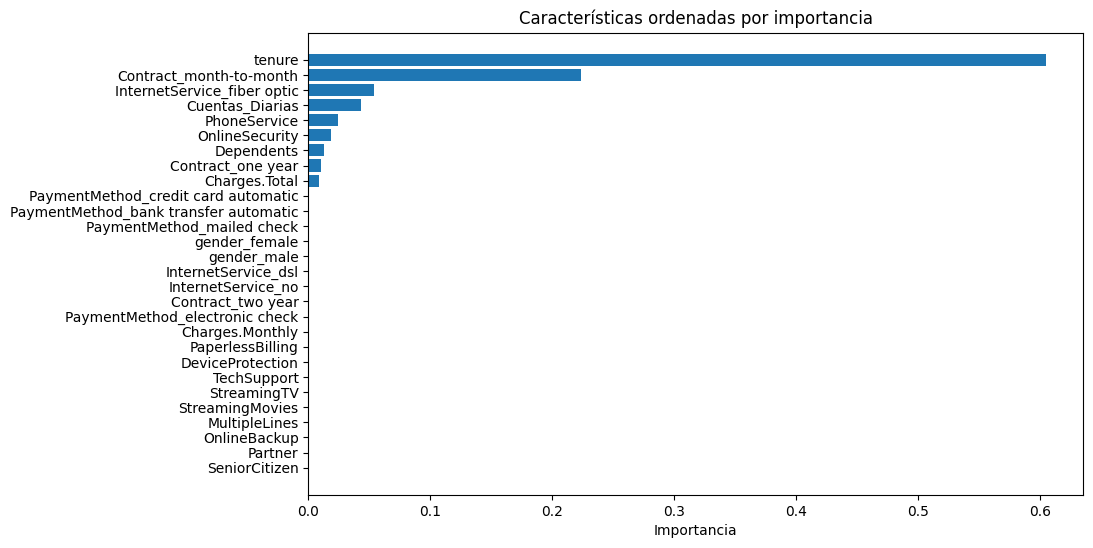

In [74]:
importancias = modelo.feature_importances_

indices = np.argsort(importancias)[::-1]

# Gráfico ordenado
plt.figure(figsize=(10, 6))
plt.barh(range(len(importancias)), importancias[indices], align='center')
plt.yticks(range(len(importancias)), X_train.columns[indices])
plt.xlabel("Importancia")
plt.title("Características ordenadas por importancia")
plt.gca().invert_yaxis()  # La más importante arriba
plt.show()

# XGBoost

In [75]:
params = {
    'objective': 'multi:softmax',
    'num_class': 2,
    'max_depth': 3,
    'eta': 0.1,
    'gamma': 0.1,
    'random_state': 5
}

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

modelo_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=False
)

In [76]:
y_pred = modelo_xgb.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print(f"Aproximación de exactitud: {accuracy:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["Exlclientes", "Clientes"]))

Aproximación de exactitud: 0.82

Reporte de clasificación:
              precision    recall  f1-score   support

 Exlclientes       0.84      0.92      0.88       777
    Clientes       0.70      0.53      0.60       280

    accuracy                           0.82      1057
   macro avg       0.77      0.72      0.74      1057
weighted avg       0.81      0.82      0.81      1057



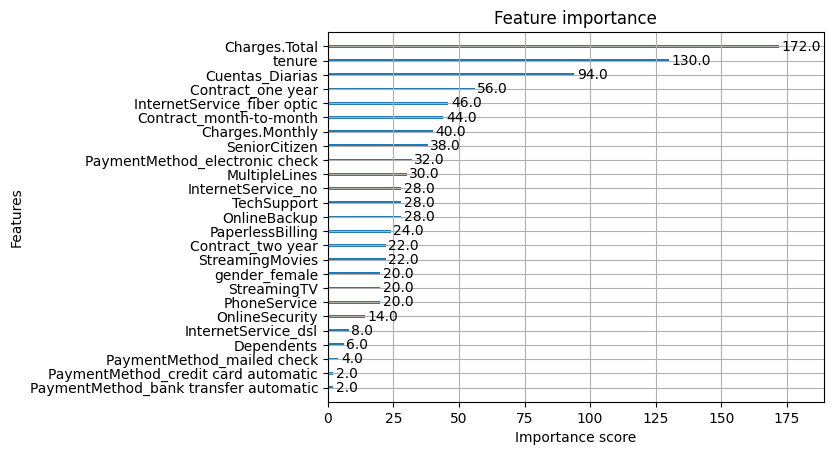

In [77]:
xgb.plot_importance(modelo_xgb)
plt.show()

#  Interpretación y Conclusiones

El modelo que presentó mejores métricas fue el DecisionTreeClassifier con profundidad igual a tres, seguido de RandomForestClassifier y XGBoost

Las variables que más influyeron en el modelo fueron:

tenure, Contract_mont-to_month e InternetService_fiber optic

La recomendación es diseñar estrategias para que los clientes permanezcan más tiempo, una de ellas podría ser aumentar por algunos meses el ancho de banda